In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=5a27dca4c80b2c7c2468d430aaf159c8cd45a7157e9af758dd071f210ee440fc
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [10]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("BigDataAnalytics").getOrCreate()

# Load data into a DataFrame using Spark
data = spark.read.csv("data.csv", header=True, inferSchema=True)

# Show the schema and some sample data
data.printSchema()
data.show(5)

# Perform data processing and analysis using Spark SQL
data.createOrReplaceTempView("myTable")

# Example: Query to get average values
average_fare = spark.sql("SELECT AVG(fare_amount) as avg_fare FROM myTable")
average_fare.show()

transformed_data = data.withColumn("new_column", data["fare_amount"] * 2)

# Show the transformed data
transformed_data.show()

# Save the transformed data to a new CSV file
transformed_data.write.csv("transformed_data.csv", header=True)

# Stop the Spark session
spark.stop()


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+---

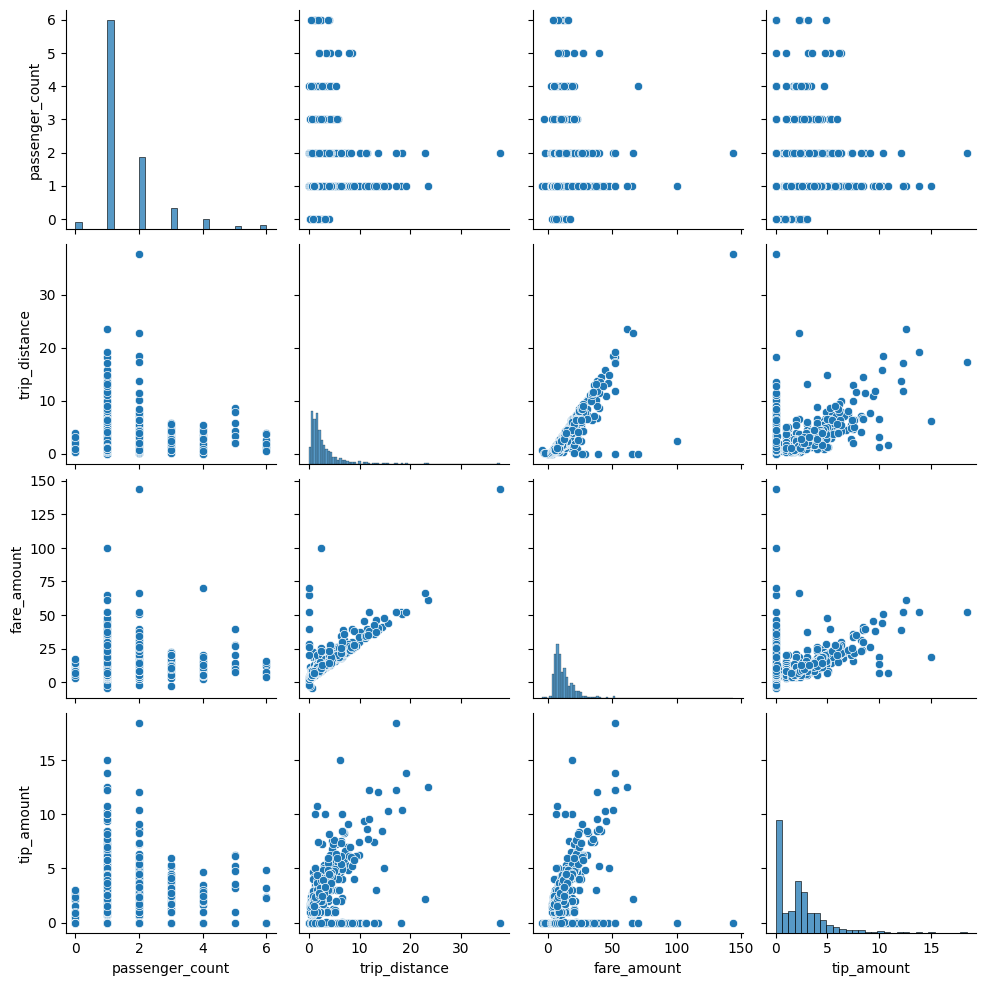

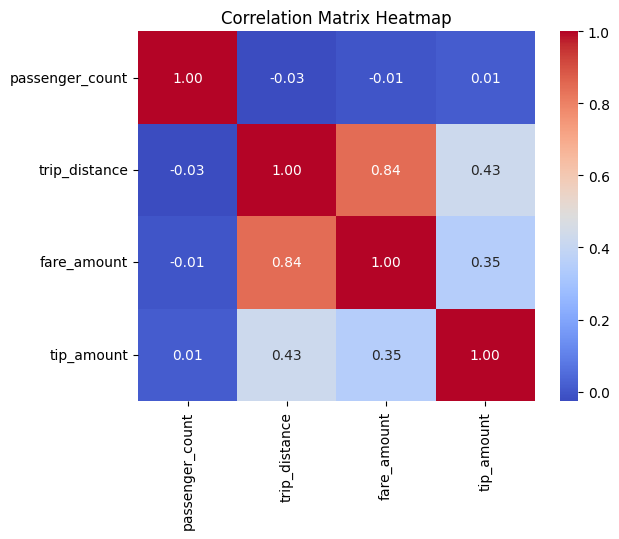

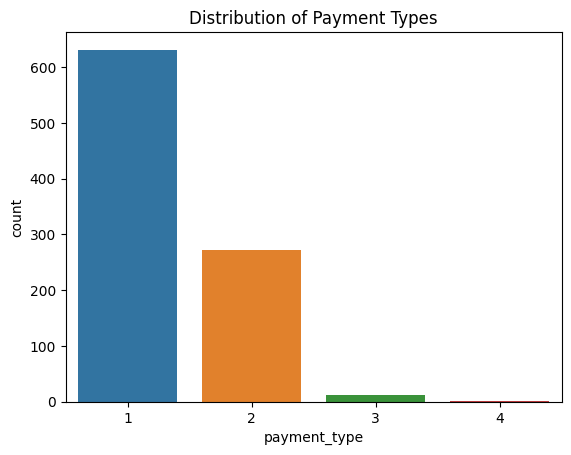

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a Pandas DataFrame
data = pd.read_csv("data.csv")

# Data preprocessing
# Example: Handling missing values by dropping rows with missing values
data.dropna(inplace=True)

# Example: Encoding categorical variable 'store_and_fwd_flag'
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# Basic data visualization
# Example: Pair plot to visualize relationships between numeric features
numeric_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']
sns.pairplot(data[numeric_columns])
plt.show()

# Example: Correlation matrix heatmap
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Example: Distribution of categorical variable 'payment_type'
sns.countplot(x='payment_type', data=data)
plt.title("Distribution of Payment Types")
plt.show()
